In [101]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import  tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

bike_sharing_data = pd.read_csv('bike_sharing.csv')
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [102]:
inputs = bike_sharing_data[['season','holiday','mnth','hr','temp','hum','windspeed','weekday','workingday','weathersit','yr','atemp']]
# inputs = bike_sharing_data[['season','holiday','mnth','hr','temp','hum','windspeed']]

In [103]:
inputs

,season,holiday,mnth,hr,temp,hum,windspeed,weekday,workingday,weathersit,yr,atemp
0,1,0,1,0,0.24,0.81,0.0000,6,0,1,0,0.2879
1,1,0,1,1,0.22,0.80,0.0000,6,0,1,0,0.2727
2,1,0,1,2,0.22,0.80,0.0000,6,0,1,0,0.2727
3,1,0,1,3,0.24,0.75,0.0000,6,0,1,0,0.2879
4,1,0,1,4,0.24,0.75,0.0000,6,0,1,0,0.2879
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,12,19,0.26,0.60,0.1642,1,1,2,1,0.2576
17375,1,0,12,20,0.26,0.60,0.1642,1,1,2,1,0.2576
17376,1,0,12,21,0.26,0.60,0.1642,1,1,1,1,0.2576
17377,1,0,12,22,0.26,0.56,0.1343,1,1,1,1,0.2727


In [104]:
target = bike_sharing_data[['cnt']]

In [105]:
target

,cnt
0,16
1,40
2,32
3,13
4,1
...,...
17374,119
17375,89
17376,90
17377,61


In [106]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

In [107]:
# Create a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=3,random_state=42)

# Train the model
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [108]:
# Predict on the test set
y_pred = regressor.predict(X_test)

In [109]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

Mean Squared Error: 16276.313706776727
R-squared Score: 0.48599076974447397


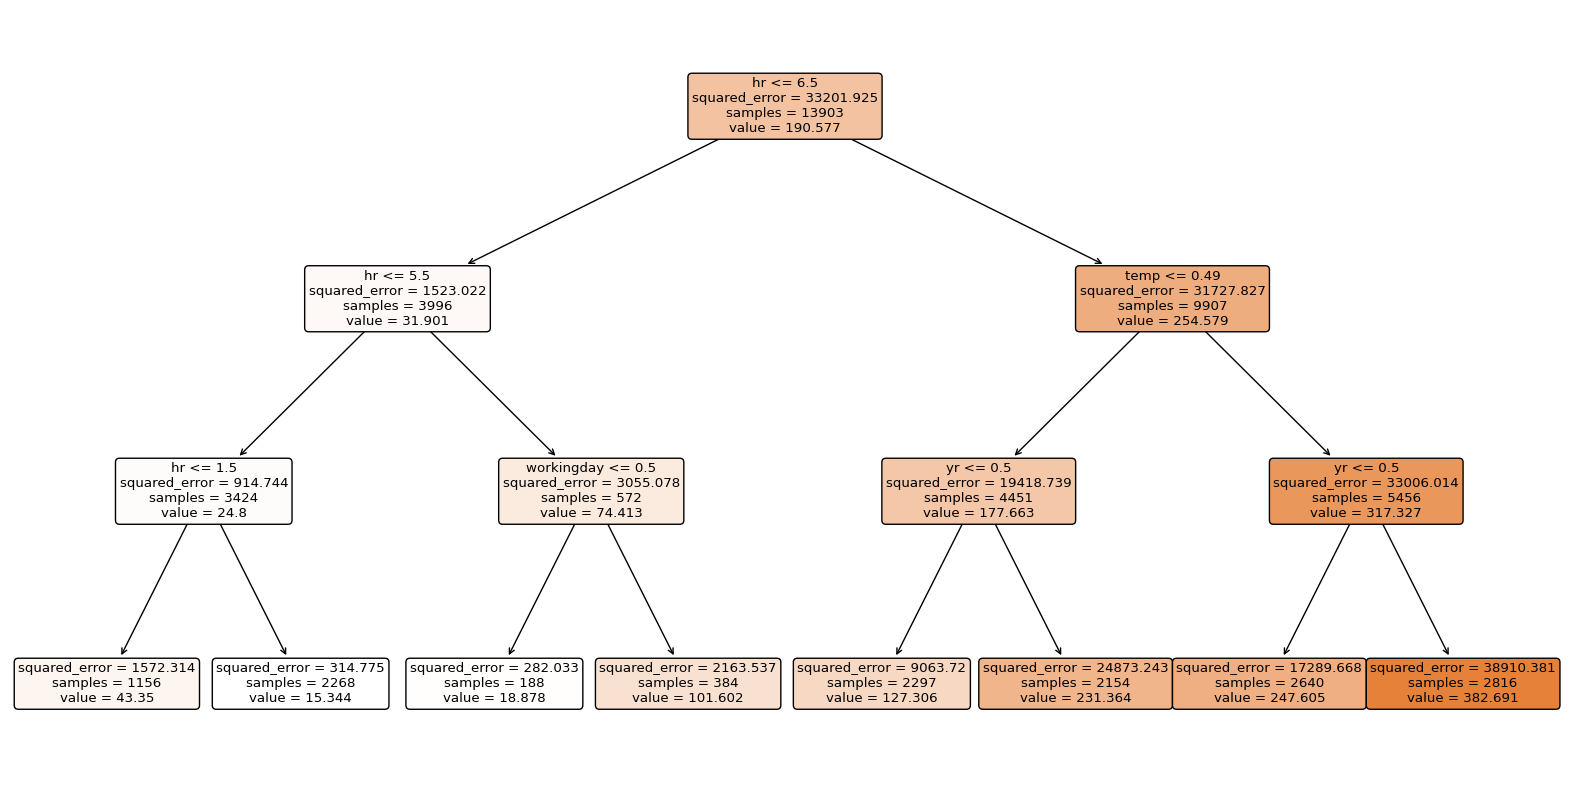

In [110]:

plt.figure(figsize=(20,10))
tree.plot_tree(regressor, feature_names=inputs.columns, filled=True, rounded=True)
plt.show()

In [ ]:
# For visualization purposes (only if you have a single feature)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', label='Actual')
plt.scatter(X_test, y_pred, color='blue', label='Predicted')
plt.title('Decision Tree Regression')
plt.xlabel(inputs.columns())
plt.ylabel('cnt')
plt.legend()
plt.show()